Import the Libraries Successfully - 
Reading of Data - 
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
Nmber of rows -  30
Columns -  Index(['YearsExperience', 'Salary'], dtype='object')
Missing
 YearsExperience    0
Salary             0
dtype: int64
YearsExperience    float64
Salary             float64
dtype: object
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_15944\1270436555.py:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(x = data['Salary'])


Salary - Skewness -  0.35411967922959153
Years of Expreience - Skewness -  0.37956024064804106


<Figure size 700x500 with 0 Axes>

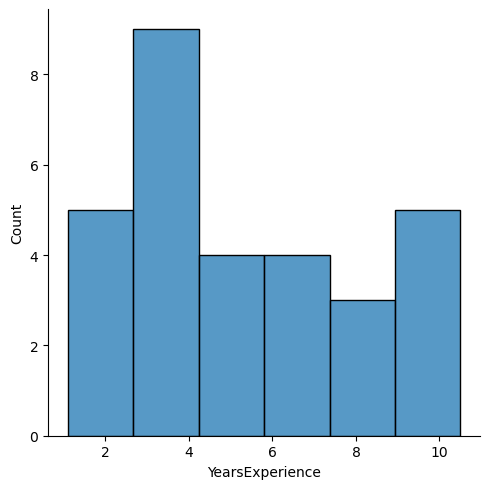

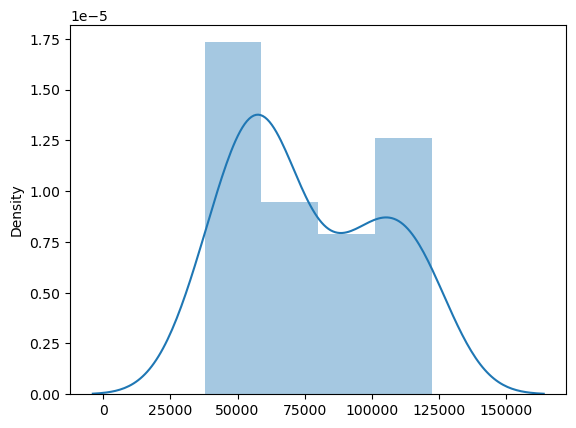

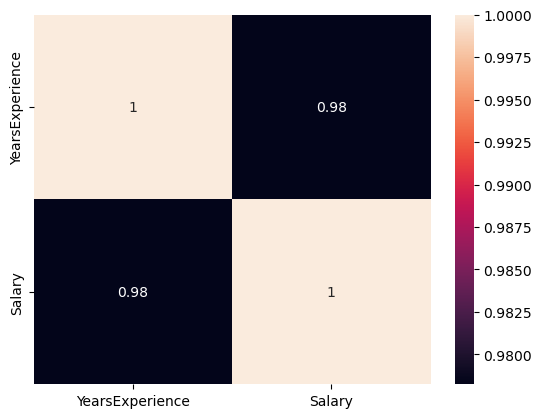

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64
Training is done --- 
Score for Training Model -  0.950740977857383
Predictions 
- [[ 55873.15231244]
 [ 62539.44008222]
 [ 46349.88406989]
 [ 37778.94265159]
 [123488.35683453]]
Final Score -  0.9734912916857618
The total time taken in seconds -  1.3918776512145996


In [2]:
##### Importing of libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
print("Import the Libraries Successfully - ")

st = time.time()
### Reading of the data -
print("Reading of Data - ")
def read_data():
    try:
        data = pd.read_csv("G:/TOP-MENTOR/File/August 10th/Project - 1&2_ Simple_Reg/Salary_data.csv")
        print(data.head(2))
        return data
    except Exception as e:
        print("Error in Read Data Function - ", e)

#### Call the function - 
data = read_data()

#### Data Profiling
def data_proifile(data):
    try:
        records = len(data)
        columns = data.columns
        missing = data.isnull().sum()
        data_types = data.dtypes
        stats = data.describe()

        print("Nmber of rows - ",records)
        print("Columns - ", columns)  
        print("Missing\n", missing)
        print(data_types)  
        print(stats)
    except Exception as e:
        print("Error in Data Profile - ",e)

#### Calling the function
data_proifile(data)

#### Expoloratory Data Analysis - 
def exploratory_analysis(data):
    try:
        plt.figure(figsize = (7,5))
        ax = sns.displot(x = data['YearsExperience'])
        plt.figure()
        ax1 = sns.distplot(x = data['Salary'])
        print("Salary - Skewness - ",data['Salary'].skew())
        print("Years of Expreience - Skewness - ",data['YearsExperience'].skew())
        corr =  data.corr()
        plt.figure()
        ax3 = sns.heatmap(corr, annot = True)
        plt.show()
        var = data.var()
        print(var)
    except Exception as e:
        print("Error in exploratory_analysis", e)
exploratory_analysis(data)



def data_splitting(data):
    try:
        X = data['YearsExperience'].values.reshape(-1,1)
        y = data['Salary'].values.reshape(-1,1)

        #### Splitting of the Data - 
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state = 1234)
        return X_train,X_test,y_train,y_test
    except Exception as e:
        print('Error in Data Splitting Function - ',e)

X_train,X_test,y_train,y_test = data_splitting(data)

#### Data Modelling  - 
def modelling(X_train, y_train):
    global model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Training is done --- ")
    coeff = model.coef_
    constant = model.intercept_
    score = model.score(X_train, y_train) #### 0 to 1
    print("Score for Training Model - ", score)
    return coeff, constant

#### Calling the functions -  
coeff, constant = modelling(X_train, y_train)

#### Predictions and Evalution on the Predicted Data - 
def model_evaluation(X_test, y_test):
    predict = model.predict(X_test)
    final_score  = r2_score(y_test,predict)
    return predict, final_score
predict, final_score = model_evaluation(X_test, y_test)
print("Predictions \n-",predict)
print('Final Score - ', final_score)

en = time.time()

print("The total time taken in seconds - ", (en - st))